##


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
housing= fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df["MedHouseValue"] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
X = df.drop('MedHouseValue', axis = 1)
y = df['MedHouseValue']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42)
print(" X train shape: ", X_train.shape)
print(" X test shape: ", X_test.shape)
print(" y train shape: ", y_train.shape)
print(" y test shape: ", y_test.shape)


 X train shape:  (16512, 8)
 X test shape:  (4128, 8)
 y train shape:  (16512,)
 y test shape:  (4128,)


In [5]:
ridge_model = Ridge(alpha = 1.0)
ridge_model.fit(X_train , y_train)

Ridge()

In [6]:
y_pred_ridge = ridge_model.predict(X_test)

In [7]:
lasso_model = Lasso(alpha = 0.1)
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.1)

In [8]:
y_pred_lasso = lasso_model.predict(X_test)

In [9]:
def adj_r2(r2 , n , p):
    return 1 - (1-r2)*(n-1)/(n-p-1)
n = X_test.shape[0]
p = X_test.shape[1]

## Ridge
ridge_mse = mean_squared_error(y_test , y_pred_ridge)
ridge_r2 = r2_score(y_test , y_pred_ridge)
adj_r2 = adj_r2(ridge_r2, n, p)
print("Ridge performance matrics ")
print("Mean squared error: ",ridge_mse )
print("R2-score: ",ridge_r2 )
print("Adjusted R2: ",adj_r2 )


Ridge performance matrics 
Mean squared error:  0.5558034669932208
R2-score:  0.5758549611440128
Adjusted R2:  0.5750311785970723


In [10]:
def adj_r2(r2 , n , p):
    return 1 - (1-r2)*(n-1)/(n-p-1)
n = X_test.shape[0]
p = X_test.shape[1]

## Lasso
lasso_mse = mean_squared_error(y_test , y_pred_lasso)
lasso_r2 = r2_score(y_test , y_pred_lasso)
lasso_adj_r2 = adj_r2(lasso_r2, n, p)
print("Lasso performance matrics ")
print("Mean squared error: ",lasso_mse )
print("R2-score: ",lasso_r2 )
print("Adjusted R2: ",lasso_adj_r2 )

Lasso performance matrics 
Mean squared error:  0.6135115198058131
R2-score:  0.5318167610318159
Adjusted R2:  0.5309074466565438


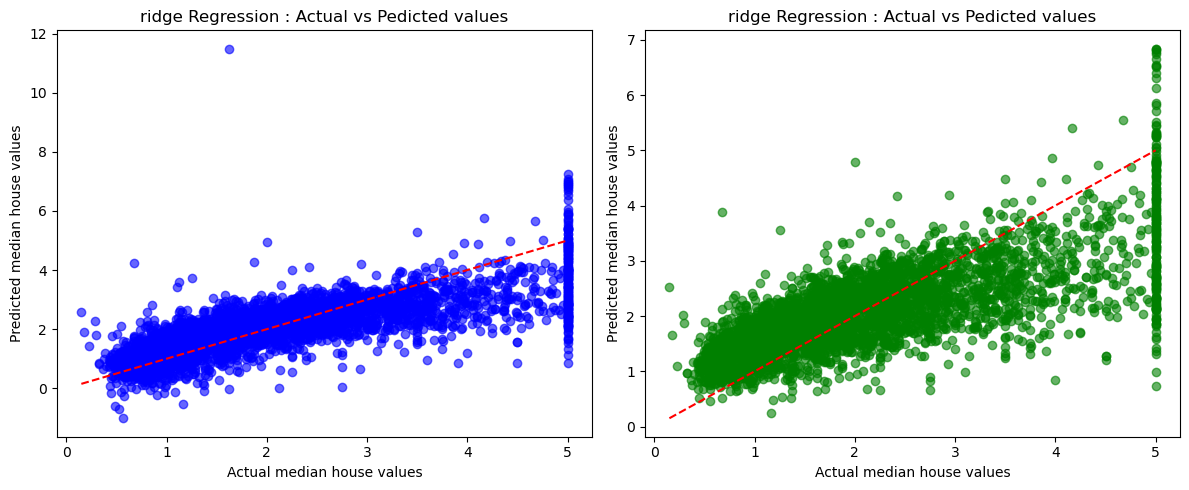

In [11]:
plt.figure(figsize = (12,5))
## Plot Ridge Regresser
plt.subplot(1,2,1)
plt.scatter(y_test , y_pred_ridge , alpha = 0.6 , color = 'blue')
plt.plot([y_test.min(), y_test.max()] , [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual median house values")
plt.ylabel("Predicted median house values")
plt.title("ridge Regression : Actual vs Pedicted values")

# plot for Lasso Regression
plt.subplot(1,2,2)
plt.scatter(y_test , y_pred_lasso , alpha = 0.6 , color = 'green')
plt.plot([y_test.min(), y_test.max()] , [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual median house values")
plt.ylabel("Predicted median house values")
plt.title("ridge Regression : Actual vs Pedicted values")

plt.tight_layout()
plt.show()
